# Linear regression

### Let's define the function!

\\( y = 5x + 3 \\)

In [88]:
%matplotlib notebook

import numpy as np

# Noise mean and standart deviation
mu, sigma = 0, 10

# Range of input values
range_min = -50
range_max = 50

# Number of examples to use for training
samples = 50

# The "ground-truth" function
slope = 5
bias = 100
f = lambda slope, bias, x: slope*x + bias

# Input values
x = np.random.uniform(range_min, range_max, samples)

# Output values with added noise
y = f(slope, bias, x) + np.random.normal(mu, sigma, samples)

for in_out in zip(x, y):
    print("X :{0:.2f} \tY:{1:.2f}".format(in_out[0], in_out[1]))

X :-45.55 	Y:-125.42
X :42.15 	Y:304.34
X :-38.29 	Y:-88.13
X :-31.54 	Y:-51.40
X :15.69 	Y:183.16
X :-12.23 	Y:54.63
X :-19.70 	Y:-10.06
X :-35.46 	Y:-93.81
X :10.66 	Y:168.16
X :-36.20 	Y:-81.23
X :-26.85 	Y:-31.63
X :-45.79 	Y:-128.61
X :-6.71 	Y:83.48
X :35.41 	Y:284.09
X :-48.70 	Y:-159.42
X :11.19 	Y:152.07
X :-43.29 	Y:-115.94
X :28.89 	Y:243.38
X :-6.48 	Y:66.99
X :-19.65 	Y:-10.43
X :45.93 	Y:334.59
X :-33.99 	Y:-58.72
X :8.46 	Y:138.56
X :-49.94 	Y:-152.31
X :14.40 	Y:157.59
X :-42.37 	Y:-107.58
X :-46.99 	Y:-138.43
X :6.33 	Y:126.22
X :-35.30 	Y:-80.54
X :16.63 	Y:176.09
X :-9.85 	Y:41.33
X :18.33 	Y:188.23
X :-48.25 	Y:-141.10
X :-35.72 	Y:-72.96
X :-7.85 	Y:64.33
X :20.44 	Y:191.55
X :-25.60 	Y:-20.89
X :29.58 	Y:236.91
X :7.58 	Y:135.84
X :-7.51 	Y:49.11
X :27.58 	Y:250.74
X :13.35 	Y:167.36
X :-47.76 	Y:-141.64
X :3.22 	Y:121.08
X :33.49 	Y:270.59
X :-47.28 	Y:-133.32
X :-49.99 	Y:-132.62
X :-10.14 	Y:51.51
X :-19.78 	Y:7.57
X :-17.77 	Y:14.27


Traceback (most recent call last):
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py", line 387, in process
    proxy(*args, **kwargs)
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Konstantinos\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [90]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Set training settings and callbacks

In [91]:
# Print the batch number at the beginning of every batch.
weight_log = []
weight_log_callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch,logs: weight_log.append([model.layers[1].get_weights()[0][0][0], model.layers[1].get_weights()[1][0]]))

# Define optimization algorithm
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam ,loss='mse')

---------------------------------------------------------------------------------

### Start training

In [92]:
# Start training
model.fit(x,y, batch_size=1, epochs=600, shuffle=False, callbacks=[weight_log_callback])

Epoch 1/600
50/50 [==============================] - 0s 5ms/step - loss: 5297.4473
Epoch 2/600
50/50 [==============================] - 0s 2ms/step - loss: 5179.1610
Epoch 3/600
50/50 [==============================] - 0s 2ms/step - loss: 5064.6636
Epoch 4/600
50/50 [==============================] - 0s 2ms/step - loss: 4953.4283
Epoch 5/600
50/50 [==============================] - 0s 2ms/step - loss: 4845.2753
Epoch 6/600
50/50 [==============================] - 0s 2ms/step - loss: 4740.0851
Epoch 7/600
50/50 [==============================] - 0s 2ms/step - loss: 4637.7765
Epoch 8/600
50/50 [==============================] - 0s 2ms/step - loss: 4538.2706
Epoch 9/600
50/50 [==============================] - 0s 2ms/step - loss: 4441.4984
Epoch 10/600
50/50 [==============================] - 0s 2ms/step - loss: 4347.4043
Epoch 11/600
50/50 [==============================] - 0s 2ms/step - loss: 4255.9184
Epoch 12/600
50/50 [==============================] - 0s 2ms/step - loss: 4166.9840
E

50/50 [==============================] - 0s 2ms/step - loss: 1642.2108
Epoch 99/600
50/50 [==============================] - 0s 2ms/step - loss: 1637.6265
Epoch 100/600
50/50 [==============================] - 0s 2ms/step - loss: 1633.1404
Epoch 101/600
50/50 [==============================] - 0s 2ms/step - loss: 1628.7466
Epoch 102/600
50/50 [==============================] - 0s 2ms/step - loss: 1624.4378
Epoch 103/600
50/50 [==============================] - 0s 2ms/step - loss: 1620.2107
Epoch 104/600
50/50 [==============================] - 0s 2ms/step - loss: 1616.0602
Epoch 105/600
50/50 [==============================] - 0s 2ms/step - loss: 1611.9813
Epoch 106/600
50/50 [==============================] - 0s 2ms/step - loss: 1607.9695
Epoch 107/600
50/50 [==============================] - 0s 2ms/step - loss: 1604.0201
Epoch 108/600
50/50 [==============================] - 0s 2ms/step - loss: 1600.1300
Epoch 109/600
50/50 [==============================] - 0s 2ms/step - loss: 1596.

50/50 [==============================] - 0s 2ms/step - loss: 1328.9167
Epoch 195/600
50/50 [==============================] - 0s 2ms/step - loss: 1326.0037
Epoch 196/600
50/50 [==============================] - 0s 2ms/step - loss: 1323.0948
Epoch 197/600
50/50 [==============================] - 0s 2ms/step - loss: 1320.1893
Epoch 198/600
50/50 [==============================] - 0s 2ms/step - loss: 1317.2878
Epoch 199/600
50/50 [==============================] - 0s 2ms/step - loss: 1314.3904
Epoch 200/600
50/50 [==============================] - 0s 2ms/step - loss: 1311.4961
Epoch 201/600
50/50 [==============================] - 0s 2ms/step - loss: 1308.6055
Epoch 202/600
50/50 [==============================] - 0s 2ms/step - loss: 1305.7183
Epoch 203/600
50/50 [==============================] - 0s 2ms/step - loss: 1302.8344
Epoch 204/600
50/50 [==============================] - 0s 2ms/step - loss: 1299.9542
Epoch 205/600
50/50 [==============================] - 0s 2ms/step - loss: 1297

50/50 [==============================] - 0s 2ms/step - loss: 1065.6460
Epoch 291/600
50/50 [==============================] - 0s 2ms/step - loss: 1063.0785
Epoch 292/600
50/50 [==============================] - 0s 2ms/step - loss: 1060.5150
Epoch 293/600
50/50 [==============================] - 0s 2ms/step - loss: 1057.9552
Epoch 294/600
50/50 [==============================] - 0s 2ms/step - loss: 1055.3989
Epoch 295/600
50/50 [==============================] - 0s 2ms/step - loss: 1052.8468
Epoch 296/600
50/50 [==============================] - 0s 2ms/step - loss: 1050.2982
Epoch 297/600
50/50 [==============================] - 0s 2ms/step - loss: 1047.7534
Epoch 298/600
50/50 [==============================] - 0s 2ms/step - loss: 1045.2116
Epoch 299/600
50/50 [==============================] - 0s 2ms/step - loss: 1042.6736
Epoch 300/600
50/50 [==============================] - 0s 2ms/step - loss: 1040.1391
Epoch 301/600
50/50 [==============================] - 0s 2ms/step - loss: 1037

50/50 [==============================] - 0s 2ms/step - loss: 833.2433
Epoch 388/600
50/50 [==============================] - 0s 2ms/step - loss: 831.0220
Epoch 389/600
50/50 [==============================] - 0s 2ms/step - loss: 828.8039
Epoch 390/600
50/50 [==============================] - 0s 2ms/step - loss: 826.5895
Epoch 391/600
50/50 [==============================] - 0s 2ms/step - loss: 824.3782
Epoch 392/600
50/50 [==============================] - 0s 2ms/step - loss: 822.1700
Epoch 393/600
50/50 [==============================] - 0s 2ms/step - loss: 819.9653
Epoch 394/600
50/50 [==============================] - 0s 2ms/step - loss: 817.7649
Epoch 395/600
50/50 [==============================] - 0s 2ms/step - loss: 815.5689
Epoch 396/600
50/50 [==============================] - 0s 2ms/step - loss: 813.3763
Epoch 397/600
50/50 [==============================] - 0s 2ms/step - loss: 811.1869
Epoch 398/600
50/50 [==============================] - 0s 2ms/step - loss: 809.0014
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 634.3167
Epoch 485/600
50/50 [==============================] - 0s 2ms/step - loss: 632.4396
Epoch 486/600
50/50 [==============================] - 0s 2ms/step - loss: 630.5660
Epoch 487/600
50/50 [==============================] - 0s 2ms/step - loss: 628.6962
Epoch 488/600
50/50 [==============================] - 0s 2ms/step - loss: 626.8304
Epoch 489/600
50/50 [==============================] - 0s 2ms/step - loss: 624.9677
Epoch 490/600
50/50 [==============================] - 0s 2ms/step - loss: 623.1084
Epoch 491/600
50/50 [==============================] - 0s 2ms/step - loss: 621.2529
Epoch 492/600
50/50 [==============================] - 0s 2ms/step - loss: 619.4014
Epoch 493/600
50/50 [==============================] - 0s 2ms/step - loss: 617.5532
Epoch 494/600
50/50 [==============================] - 0s 2ms/step - loss: 615.7082
Epoch 495/600
50/50 [==============================] - 0s 2ms/step - loss: 613.8668
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 468.5503
Epoch 582/600
50/50 [==============================] - 0s 2ms/step - loss: 467.0119
Epoch 583/600
50/50 [==============================] - 0s 2ms/step - loss: 465.4774
Epoch 584/600
50/50 [==============================] - 0s 2ms/step - loss: 463.9465
Epoch 585/600
50/50 [==============================] - 0s 2ms/step - loss: 462.4190
Epoch 586/600
50/50 [==============================] - 0s 2ms/step - loss: 460.8949
Epoch 587/600
50/50 [==============================] - 0s 2ms/step - loss: 459.3743
Epoch 588/600
50/50 [==============================] - 0s 2ms/step - loss: 457.8575
Epoch 589/600
50/50 [==============================] - 0s 2ms/step - loss: 456.3443
Epoch 590/600
50/50 [==============================] - 0s 2ms/step - loss: 454.8343
Epoch 591/600
50/50 [==============================] - 0s 2ms/step - loss: 453.3274
Epoch 592/600
50/50 [==============================] - 0s 2ms/step - loss: 451.8236
Epoch 

-----------------------------------------------------------------------------------------------------------------------------

### Animate training 

<IPython.core.display.Javascript object>


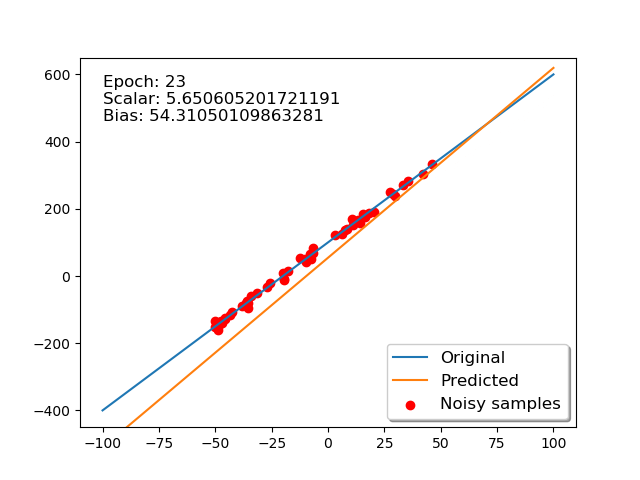

In [93]:
# Use the neural network to predict new output
test_input = np.linspace(range_min*2, range_max*2)
weights = model.layers[1].get_weights()

import matplotlib.pyplot as plt
import matplotlib.animation

fig, ax = plt.subplots()
ax.scatter(x,y, c='r', label='Noisy samples')
ax.plot(test_input, f(slope, bias, test_input), label='Original')
data, = ax.plot([], [], label='Predicted')
text = ax.text(range_min*2, f(slope, bias, range_max*2)-140, '', fontsize='large')
ax.legend(loc='lower right', shadow=True, fontsize='large')

def animate(frame, data, weight_log, text):
    weights[0][0] = weight_log[frame][0]
    weights[1][0] = weight_log[frame][1]
    model.layers[1].set_weights(weights)
    data.set_data(test_input, model.predict(test_input))
    text.set_text("Epoch: {}\nScalar: {}\nBias: {}".format(frame, weight_log[frame][0], weight_log[frame][1]))
    return data, text,
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(weight_log), fargs=(data, weight_log, text), interval=20, blit=True)
fig.show()